In [1]:
from greensight.utils import DIR_ROOT, DIR_DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Configuration 
DROP_NA = False
REMOVE_SEAONALITY = True

# Figure output
DIR_REPORT_FIGS = DIR_ROOT / "documents/presentations/2025-03-05/figs"
if not DIR_REPORT_FIGS.is_dir():
    DIR_REPORT_FIGS.mkdir(parents=True)

assert DIR_REPORT_FIGS.is_dir()

# Data path
if DROP_NA: 
    path_in = DIR_DATA / "processed_data/data_all_droppedna.hdf"
else:
    path_in = DIR_DATA / "processed_data/data_all.hdf"
print("drop na: \t", DROP_NA )
print("data path: \t", path_in)

drop na: 	 False
data path: 	 /home/finley/Work/RDS/projects/greensight/data/processed_data/data_all.hdf


In [3]:
df = pd.read_parquet(path_in)
df.head(5)

greenbelt  Bath and Bristol                                              \
band                   soil vegetation      VHAsc      VHDes      VVAsc   
2017-04-01        20.513539   0.867165 -18.399888 -22.760538 -12.631246   
2017-05-01        20.547113   0.877612 -18.302422 -22.184896 -12.572460   
2017-06-01        20.593652   0.891680 -17.865307 -21.927412 -12.237822   
2017-07-01        20.628014   0.900990 -17.279926 -21.967014 -11.598811   
2017-08-01        20.635065   0.909481 -18.390791 -21.526890 -12.278289   

greenbelt                                                                ...  \
band            VVDes          B1          B11          B12          B2  ...   
2017-04-01 -18.038478  249.901535  1972.478632  1085.123853  334.255209  ...   
2017-05-01 -17.411590  211.897609  1967.190929  1038.574691  308.149490  ...   
2017-06-01 -17.332710  308.439303  2200.748940  1170.853821  377.986567  ...   
2017-07-01 -17.204130  409.558347  1943.604229  1027.210660  432.151726  ...   
2017-08-01 -16.212963    0.000000     0.000000     0.000000    0.000000  ...   

greenbelt       York                                                         \
band           pssra          pvi      reip         ri        rvi     s2rep   
2017-04-01 -0.141257  2532.172821  0.282387   3.785372   3.785372  0.141257   
2017-05-01 -0.316820  3628.512919  0.539644  29.171322  29.171322  0.316820   
2017-06-01 -0.290147  3603.653712  0.504369  21.845344  21.845344  0.290147   
2017-07-01 -0.263473  3578.794505  0.469093  14.519367  14.519367  0.263473   
2017-08-01 -0.222074  3485.569390  0.424536   6.981650   6.981650  0.222074   

greenbelt                                              
band            savi     tndvi     tsavi         wdvi  
2017-04-01  0.635326  0.423597  0.423584  2544.802191  
2017-05-01  1.129914  0.753353  0.753331  3646.610352  
2017-06-01  1.071730  0.714560  0.714539  3621.627158  
2017-07-01  1.013546  0.675767  0.675747  3596.643965  
2017-08-01  0.941076  0.627449  0.627431  3502.953884  

[5 rows x 768 columns]

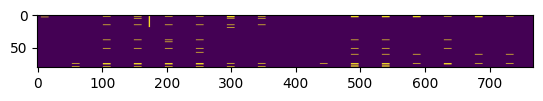

In [4]:
plt.imshow(df == 0.)

In [5]:
if DROP_NA:
    # drop the 0.0 values
    df.replace(0.0, np.nan, inplace=True)
    assert df.isna().any().any() == True 
    assert (df == 0.0).any().any() == False
else:
    # interpolate the na/0 values
    df.replace(0.0, np.nan, inplace=True)
    df = df.interpolate(method='linear', limit_direction='forward', axis=0)
    df = df.fillna(method="backfill")

assert not df.isna().any().any(), "should not be any missing values"

/tmp/ipykernel_35409/792812067.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="backfill")


In [6]:
greenbelts = list(set([i[0] for i in df.columns]))

In [22]:
# remove seasonality by removing the average for each band at each greenbelt over all the years
annual_means = df.groupby(df.index.month).mean()
annual_means

greenbelt Bath and Bristol                                              \
band                  soil vegetation      VHAsc      VHDes      VVAsc   
1                20.533176   0.863619 -17.559840 -18.337092 -10.978495   
2                20.507126   0.858166 -17.788988 -18.689087 -10.985174   
3                20.489546   0.858166 -17.854678 -18.747201 -11.127623   
4                20.499034   0.864749 -18.200129 -19.094748 -12.016009   
5                20.535110   0.875428 -18.380979 -19.272526 -12.339415   
6                20.582650   0.889451 -18.117451 -18.888878 -12.124745   
7                20.619816   0.899904 -17.998604 -18.984563 -11.847047   
8                20.633965   0.906783 -18.489368 -19.025660 -11.967086   
9                20.644839   0.909192 -18.489690 -19.511643 -11.831411   
10               20.621452   0.903931 -18.252139 -18.831047 -11.562185   
11               20.586847   0.889357 -17.761506 -18.186363 -11.234937   
12               20.553355   0.874980 -17.219270 -18.054532 -10.773304   

greenbelt                                                               ...  \
band           VVDes          B1          B11          B12          B2  ...   
1         -11.870891  330.721135  1316.357737   769.035548  439.049722  ...   
2         -12.035631  286.711657  1779.438318  1061.532006  389.573524  ...   
3         -11.998488  414.399314  1849.258366  1095.862803  485.461817  ...   
4         -12.890498  349.057581  1952.514851  1112.845092  413.545240  ...   
5         -13.207989  356.659204  1937.877500  1047.417444  414.437046  ...   
6         -12.950148  362.619119  2166.016744  1188.038647  445.417396  ...   
7         -12.893600  415.543667  2283.870195  1258.451666  484.946966  ...   
8         -12.568106  508.165012  2130.640257  1190.914591  560.528555  ...   
9         -12.816176  358.760555  2122.314619  1204.978587  442.960262  ...   
10        -12.261761  288.611200  1702.845263   947.543764  377.839383  ...   
11        -11.774994  196.548321  1571.135879   883.915228  293.567515  ...   
12        -11.647784  505.046386  1131.815602   675.408022  559.372565  ...   

greenbelt      York                                                         \
band          pssra          pvi      reip         ri        rvi     s2rep   
1         -0.218099  2228.949541  0.341985   5.772244   5.772244  0.218099   
2         -0.153684  2372.036392  0.322346   5.149997   5.149997  0.153684   
3         -0.133231  2594.089872  0.364572   4.948587   4.948587  0.133231   
4         -0.180895  2941.797220  0.397558   6.103913   6.103913  0.180895   
5         -0.305891  3676.522282  0.505642  11.961905  11.961905  0.305891   
6         -0.325518  3813.016947  0.516415  11.239411  11.239411  0.325518   
7         -0.253124  3321.074566  0.429287   8.608176   8.608176  0.253124   
8         -0.115253  2878.476970  0.351899   5.003375   5.003375  0.115253   
9         -0.086800  2692.735747  0.358605   5.712027   5.712027  0.086800   
10        -0.150743  2423.534127  0.363781   6.121842   6.121842  0.150743   
11        -0.190378  2323.164689  0.373902  10.148388  10.148388  0.190378   
12        -0.213192  2119.433876  0.336878   5.628891   5.628891  0.213192   

greenbelt                                             
band           savi     tndvi     tsavi         wdvi  
1          0.855535  0.570457  0.570428  2240.066565  
2          0.778704  0.519218  0.519194  2383.867071  
3          0.828516  0.552421  0.552399  2607.028057  
4          0.866041  0.577427  0.577408  2956.469616  
5          1.054553  0.703105  0.703085  3694.859166  
6          1.083551  0.722437  0.722417  3832.034606  
7          0.946247  0.630900  0.630881  3337.638632  
8          0.772917  0.515338  0.515321  2892.833552  
9          0.798888  0.532660  0.532641  2706.165934  
10         0.834591  0.556480  0.556455  2435.621654  
11         0.910762  0.607280  0.607250  2334.751617  
12         0.839509  0.559775  0.559746  2130.00

In [31]:
df

greenbelt  Bath and Bristol                                              \
band                   soil vegetation      VHAsc      VHDes      VVAsc   
2017-04-01        20.513539   0.867165 -18.399888 -22.760538 -12.631246   
2017-05-01        20.547113   0.877612 -18.302422 -22.184896 -12.572460   
2017-06-01        20.593652   0.891680 -17.865307 -21.927412 -12.237822   
2017-07-01        20.628014   0.900990 -17.279926 -21.967014 -11.598811   
2017-08-01        20.635065   0.909481 -18.390791 -21.526890 -12.278289   
...                     ...        ...        ...        ...        ...   
2023-08-01        20.571600   0.910297 -18.151201 -18.118544 -11.672329   
2023-09-01        20.568847   0.913536 -18.216297 -18.378292 -11.603202   
2023-10-01        20.529241   0.910317 -17.829495 -18.298938 -11.221355   
2023-11-01        20.494722   0.895839 -17.721905 -17.007086 -11.151742   
2023-12-01        20.468242   0.882823 -16.551247 -16.579332 -10.284951   

greenbelt                                                                 ...  \
band            VVDes          B1          B11          B12           B2  ...   
2017-04-01 -18.038478  249.901535  1972.478632  1085.123853   334.255209  ...   
2017-05-01 -17.411590  211.897609  1967.190929  1038.574691   308.149490  ...   
2017-06-01 -17.332710  308.439303  2200.748940  1170.853821   377.986567  ...   
2017-07-01 -17.204130  409.558347  1943.604229  1027.210660   432.151726  ...   
2017-08-01 -16.212963  345.559891  1952.066124  1040.155155   407.828245  ...   
...               ...         ...          ...          ...          ...  ...   
2023-08-01 -11.570697  434.534375  2107.699730  1146.719031   452.378075  ...   
2023-09-01 -11.652088  367.286057  2151.105350  1200.017345   469.735121  ...   
2023-10-01 -11.527336  302.072039  1607.448392   884.048998   402.726500  ...   
2023-11-01 -10.561257  159.406392  1481.119067   823.615632   274.883669  ...   
2023-12-01 -10.280130  970.479955   743.688274   524.711003  1014.979556  ...   

greenbelt       York                                                         \
band           pssra          pvi      reip         ri        rvi     s2rep   
2017-04-01 -0.141257  2532.172821  0.282387   3.785372   3.785372  0.141257   
2017-05-01 -0.316820  3628.512919  0.539644  29.171322  29.171322  0.316820   
2017-06-01 -0.290147  3603.653712  0.504369  21.845344  21.845344  0.290147   
2017-07-01 -0.263473  3578.794505  0.469093  14.519367  14.519367  0.263473   
2017-08-01 -0.222074  3485.569390  0.424536   6.981650   6.981650  0.222074   
...              ...          ...       ...        ...        ...       ...   
2023-08-01 -0.180230  2838.909793  0.397175   6.360105   6.360105  0.180230   
2023-09-01 -0.109655  2876.646591  0.369523   5.593981   5.593981  0.109655   
2023-10-01 -0.192763  2634.818099  0.404619   6.284367   6.284367  0.192763   
2023-11-01 -0.192424  2296.166714  0.369096   6.531642   6.531642  0.192424   
2023-12-01 -0.256962  1801.523696  0.272067   3.219633   3.219633  0.256962   

greenbelt                                              
band            savi     tndvi     tsavi         wdvi  
2017-04-01  0.635326  0.423597  0.423584  2544.802191  
2017-05-01  1.129914  0.753353  0.753331  3646.610352  
2017-06-01  1.071730  0.714560  0.714539  3621.627158  
2017-07-01  1.013546  0.675767  0.675747  3596.643965  
2017-08-01  0.941076  0.627449  0.627431  3502.953884  
...              ...       ...       ...          ...  
2023-08-01  0.857335  0.571634  0.571612  2853.069032  
2023-09-01  0.815699  0.543866  0.543847  2890.994045  
2023-10-01  0.896599  0.597820  0.597795  2647.959418  
2023-11-01  0.912062  0.608147  0.608117  2307.618989  
2023-12-01  0.656154  0.437515  0.437492  1810.508908  

[81 rows x 768 columns]

In [28]:
n_years = df.index.max().year - df.index.min().year
n_years

6

ValueError: x and y must have same first dimension, but have shapes (81,) and (72,)

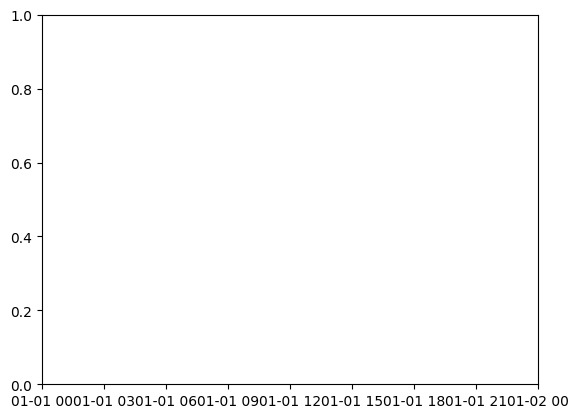

In [30]:
mu = np.concat([annual_means["Bath and Bristol"]["soil"] for _ in range(n_years)])
fig, ax = plt.subplots()
ax.plot(df.index, mu)


In [42]:
# find the columns common to all greenbelts
cols = [df[gb].columns for gb in list(greenbelts)]

common_cols = cols[0]
for arr in cols[1:]:
    common_cols = np.intersect1d(common_cols, arr)

# should be all columns
assert len(common_cols) == len(df["Bath and Bristol"].columns)

In [65]:
# find correlations with soil and vegetation 
gb_corrs = {}
for i, gb in enumerate(list(greenbelts)[1:]):
    df_gb = df[gb][common_cols]

    # move soil and vegetation to the end
    df_gb = df_gb[[i for i in df_gb.columns if i not in ["soil", "vegetation"]] + ["soil", "vegetation"]]

    c = df_gb.corr()[-2:].T[:-2]
    gb_corrs[gb] = c

# corr = np.stack(corr, 0)


In [66]:
gb_corrs["Bath and Bristol"]

band,soil,vegetation
band,,
B1,-0.005890,0.048629
B11,0.234798,0.387147
B12,0.171805,0.309008
B2,-0.012514,0.060404
B3,0.091372,0.260607
B4,0.037135,0.139692
B5,0.059519,0.242662
B6,0.087974,0.305522
B7,0.090979,0.301969
